In [1]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 1. TimeGAN model
from timegan import timegan
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation
# 3. Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

import tensorflow as tf

import os

In [2]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = "0"
config = tf.compat.v1.ConfigProto() # Another Version: config = tf.ConfigProto()
config.gpu_options.allow_growth = True

In [3]:
## Data loading
data_name = 'sine'
seq_len = 24

if data_name in ['stock', 'energy']:
  ori_data = real_data_loading(data_name, seq_len)
elif data_name == 'sine':
  # Set number of samples and its dimensions
  no, dim = 10000, 5
  ori_data = sine_data_generation(no, seq_len, dim)
    
print(data_name + ' dataset is ready.')

sine dataset is ready.


In [4]:
## Newtork parameters
parameters = dict()

parameters['module'] = 'gru' 
parameters['hidden_dim'] = 20
parameters['num_layer'] = 3
parameters['iterations'] = 5000
parameters['batch_size'] = 128

In [5]:
# scenario2-(1): 10% of the original data samples
# energy shape: (10000, 24, 6)

num_samples = len(ori_data)
p_rate = int(np.ceil(0.05 * num_samples)) # 10% of original samples
ori_data = np.array(ori_data)
new_ori_data = ori_data[:p_rate, :, :] #(1000, 24, 28)
print("new 10% data shape: ", new_ori_data.shape)
new_ori_data = list(new_ori_data)

new 10% data shape:  (500, 24, 5)


In [6]:
# Run TimeGAN
generated_data = timegan(new_ori_data, parameters)   
print('Finish Synthetic Data Generation')





Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons


2021-08-16 19:47:16.659464: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-08-16 19:47:16.704918: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla V100-PCIE-32GB major: 7 minor: 0 memoryClockRate(GHz): 1.38
pciBusID: 0000:3b:00.0
2021-08-16 19:47:16.705108: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2021-08-16 19:47:16.706220: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2021-08-16 19:47:16.707271: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10.0
2021-08-16 19:47:16.707525: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10.0
2021-08-16 19:47:16.708855: I tensorflow/stream_executor/platfo

Start Embedding Network Training


2021-08-16 19:47:19.519626: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0


step: 0/5000, e_loss: 0.3212
step: 1000/5000, e_loss: 0.0337
step: 2000/5000, e_loss: 0.025
step: 3000/5000, e_loss: 0.0182
step: 4000/5000, e_loss: 0.0149
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0/5000, s_loss: 0.185
step: 1000/5000, s_loss: 0.0198
step: 2000/5000, s_loss: 0.0128
step: 3000/5000, s_loss: 0.0107
step: 4000/5000, s_loss: 0.0087
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/5000, d_loss: 2.0625, g_loss_u: 0.7275, g_loss_s: 0.0173, g_loss_v: 0.3102, e_loss_t0: 0.1073
step: 1000/5000, d_loss: 1.9033, g_loss_u: 0.9269, g_loss_s: 0.0136, g_loss_v: 0.0409, e_loss_t0: 0.0106
step: 2000/5000, d_loss: 2.1057, g_loss_u: 0.8828, g_loss_s: 0.0184, g_loss_v: 0.0564, e_loss_t0: 0.0088
step: 3000/5000, d_loss: 1.9417, g_loss_u: 1.1395, g_loss_s: 0.0132, g_loss_v: 0.039, e_loss_t0: 0.0085
step: 4000/5000, d_loss: 1.953, g_loss_u: 1.1376, g_loss_s: 0.0117, g_loss_v: 0.0484, e_loss_t0: 0.0062
Finish Joint Training
Finish S

In [7]:
filename = data_name + "_data_TimeGAN_5000_sce2-2-0-005.npy"
np.save(filename, generated_data)

In [8]:
generated_data.shape

(391500, 24, 5)

In [9]:
generated_data[0][0]

array([0.52236762, 0.5260528 , 0.52599413, 0.52203328, 0.52551164])

In [10]:
metric_iteration = 5

predictive_score = list()
for tt in range(metric_iteration):
  temp_pred = predictive_score_metrics(new_ori_data, generated_data)
  predictive_score.append(temp_pred)   
    
print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))

Instructions for updating:
Please use tf.global_variables instead.



2021-08-16 21:32:15.345801: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla V100-PCIE-32GB major: 7 minor: 0 memoryClockRate(GHz): 1.38
pciBusID: 0000:3b:00.0
2021-08-16 21:32:15.345895: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2021-08-16 21:32:15.345910: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2021-08-16 21:32:15.345922: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10.0
2021-08-16 21:32:15.345934: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10.0
2021-08-16 21:32:15.345943: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10.0
2021-08-16 21:32:15.345955: I tensorflow/stream_executor

Predictive score: 0.1145


In [11]:
print("all the predictive scores: ", predictive_score)
print('Predictive score avg. value: ' + str(np.round(np.mean(predictive_score), 4)))
print('Predictive score std. value: ' + str(np.round(np.std(predictive_score), 4)))

all the predictive scores:  [0.11052535420622389, 0.12247590687316015, 0.10904669992345359, 0.12183594377206466, 0.10843166721416712]
Predictive score avg. value: 0.1145
Predictive score std. value: 0.0063


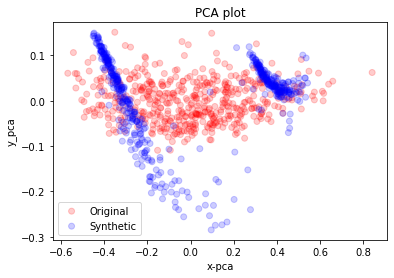

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.029213
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.732784
[t-SNE] KL divergence after 300 iterations: 0.468878


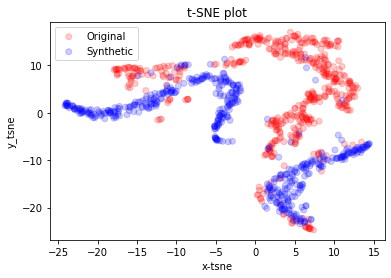

In [13]:
visualization(new_ori_data, generated_data, 'pca')
visualization(new_ori_data, generated_data, 'tsne')

In [14]:
!mv ./pca-results-sines-sce2-1-1.png ./figures_timegan_sce2
!mv ./tsne-results-sines-sce2-1-1.png ./figures_timegan_sce2